1. Can we use Bagging for regression problems?

ANS. The technique involves training multiple regression models on different subsets of the training data and then averaging their predictions to make the final prediction.

2. What is the difference between multiple model training and single model training?

ANS. Single Model Training: This involves training one model on the entire dataset.
Multiple Model Training: Involves training several models on different subsets or variations of the dataset, combining their predictions. This helps in reducing overfitting and improving performance.

3. Explain the concept of feature randomness in Random Forest
ANS.In Random Forest, feature randomness refers to randomly selecting a subset of features for each split in a decision tree. This helps in making the trees more diverse and reducing overfitting.


4. What is OOB (Out-of-Bag) Score?
ANS.The OOB Score is an estimate of the model’s performance. It is calculated by evaluating each tree in the forest on the samples that were not used during its training


5. How can you measure the importance of features in a Random Forest model?
ANS. Feature importance in Random Forest can be measured by calculating the decrease in impurity or the increase in prediction error when the feature is permuted. Common methods include Gini importance and Permutation importance.


6. Explain the working principle of a Bagging Classifier?
ANS. A Bagging Classifier works by creating multiple subsets of the original dataset using bootstrap sampling, training a base model on each subset, and combining the predictions of all base models (usually through voting or averaging).


7. How do you evaluate a Bagging Classifier’s performance?
ANS.Performance can be evaluated using metrics like accuracy, precision, recall, F1-score, or ROC-AUC for classification problems. Cross-validation and OOB score are also commonly used.


8.How does a Bagging Regressor work?
ANS. Bagging Regressor works similarly to a Bagging Classifier but is used for regression problems. It creates multiple subsets of the dataset using bootstrap sampling, trains a regression model on each subset, and averages the predictions of all models.


9.What is the main advantage of ensemble techniques?
ANS. The main advantage is the improved performance through variance reduction, increased robustness, and better generalization compared to individual models.


10. What is the main challenge of ensemble methods?
ANS.The main challenge is increased computational complexity and training time due to the need to train multiple models.

11. Explain the key idea behind ensemble techniques?
ANS. The key idea is to combine the predictions of multiple models to produce a more accurate and robust prediction. This can be achieved through techniques like Bagging, Boosting, and Stacking


12. What is a Random Forest Classifier?
ANS. A Random Forest Classifier is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification tasks.


13. What are the main types of ensemble techniques?
ANS.Bagging (Bootstrap Aggregating)
Boosting (e.g., AdaBoost, Gradient Boosting)
Stacking (Stacked Generalization)


14. What is ensemble learning in machine learning?
ANS. Ensemble learning is a technique that combines multiple individual models (learners) to produce a single, stronger model that improves the overall performance and robustness.


15. When should we avoid using ensemble methods?
ANS. Assembly methods may not be suitable when:
Computing resources are limited.
Interpretability of the model is crucial.
The base model alone provides sufficient performance.


16. How does bagging help in reducing overfitting?
ANS. Bagging reduces overfitting by training multiple models on different subsets of the data, thereby reducing the variance and making the ensemble less sensitive to noise in the training data.


17. Why is Random Forest better than a single Decision Tree?
ANS. Random Forest is better because it reduces overfitting by averaging multiple decision trees, increasing robustness and improving generalization to unseen data.


18. What is the role of bootstrap sampling in Bagging?
ANS. Bootstrap sampling involves randomly selecting subsets of data with replacement to create multiple training sets. This ensures diversity among the models and helps reduce overfitting.


19. What are some real-world applications of ensemble techniques?
ANS. Fraud detection
Medical diagnosis
Stock market prediction
Recommendation systems
Sentiment analysis


20. What is the difference between Bagging and Boosting?

Bagging: Reduces variance by training models in parallel on different subsets of the data and averaging their predictions.
Boosting: Reduces bias by training models sequentially, where each model attempts to correct the errors of the previous one.

# ---------------------- Practical ------------------------------

In [3]:
#21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

data=load_breast_cancer()
X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

clf=BaggingClassifier(estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy_score(y_test,y_pred)


0.9473684210526315

In [4]:
#22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score

data=fetch_california_housing()
X,y=data.data,data.target
X
y

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

clf=BaggingRegressor(estimator=DecisionTreeRegressor())
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

r2_score(y_test,y_pred)

0.7851780585913783

In [5]:
#23.Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data=load_breast_cancer()
#print(data)

X,y=data.data,data.target
X
y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


clf=RandomForestClassifier( min_samples_split=4,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.9649122807017544

In [6]:
# 24.Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

data=fetch_california_housing()
X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

reg_model1=RandomForestRegressor()
reg_model1.fit(X_train,y_train)
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

y_pred=reg_model1.predict(X_test)
y_pred2=dt_model.predict(X_test)

print(f" r2 score for randomforest {r2_score(y_test,y_pred)}")
print(f"r2 score for decision tree {r2_score(y_test,y_pred2)}")

 r2 score for randomforest 0.8047604106733843
r2 score for decision tree 0.6026890860464447


In [7]:
#25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data=load_breast_cancer()
#print(data)

X,y=data.data,data.target
X
y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


clf=RandomForestClassifier( min_samples_split=4,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

clf.oob_score

True

In [8]:
#26.  Train a Bagging Classifier using SVM as a base estimator and print accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

data=load_breast_cancer()
X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

clf=BaggingClassifier(estimator=SVC())
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.9473684210526315

In [9]:
#27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

data=load_breast_cancer()
#print(data)

X,y=data.data,data.target
X
y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


rfc1=RandomForestClassifier( min_samples_split=4,oob_score=True)
rfc1.fit(X_train,y_train)
y_pred=rfc1.predict(X_test)

print(f" the accuracy of standard random forest {accuracy_score(y_test,y_pred)}")

rfc2=RandomForestClassifier(n_estimators=60, min_samples_split=4,max_features="log2")
rfc2.fit(X_train,y_train)
y_pred2=rfc2.predict(X_test)
print(f" the accuracy of s random forest model 2 {accuracy_score(y_test,y_pred2)}")


 the accuracy of standard random forest 0.9707602339181286
 the accuracy of s random forest model 2 0.9707602339181286


In [10]:
#28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

data=load_breast_cancer()
X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

clf=BaggingClassifier(estimator=LogisticRegression())
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy_score(y_test,y_pred)



0.9649122807017544

In [11]:
#29. Train a Random Forest Regressor and analyze feature importance scores

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np 

data=load_diabetes()
X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

reg_model1=RandomForestRegressor()
reg_model1.fit(X_train,y_train)
y_pred=reg_model1.predict(X_test)


print(f" r2 score for randomforest {r2_score(y_test,y_pred)}")

feature_importance=reg_model1.feature_importances_
feature_names=data.feature_names

df=pd.DataFrame({"feature name":feature_names,"feature importance":feature_importance})
df=df.sort_values(by="feature importance")
df

 r2 score for randomforest 0.4678921839795316


,feature name,feature importance
1,sex,0.011496
7,s4,0.026382
4,s1,0.055157
5,s2,0.056618
6,s3,0.059810
9,s6,0.063245
0,age,0.063819
3,bp,0.102866
8,s5,0.182296
2,bmi,0.378311


In [12]:
#30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


iris = load_digits()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_clf = BaggingClassifier()
bagging_clf.fit(X_train, y_train)

random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)

y_pred_bagging = bagging_clf.predict(X_test)
y_pred_rf = random_forest_clf.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Bagging Classifier Accuracy: {accuracy_bagging}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")


Bagging Classifier Accuracy: 0.937037037037037
Random Forest Classifier Accuracy: 0.9814814814814815


In [13]:
#31.Train a Random Forest Classifier and tune hyperparameters using GridSearchCV?

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf=RandomForestClassifier()
iris = load_digits()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.model_selection import GridSearchCV


param={"max_depth":[5,7,10,15,12,17],
      "n_estimators":[100,200,500,50,60,0,40,30],
       "criterion":["gini", "entropy", "log_loss"]}

model=GridSearchCV(clf,param_grid=param,cv=2,verbose=5)


model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(f"Bagging Classifier Accuracy: {accuracy}")

       

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV 1/2] END criterion=gini, max_depth=5, n_estimators=100;, score=0.919 total time=   0.3s
[CV 2/2] END criterion=gini, max_depth=5, n_estimators=100;, score=0.938 total time=   0.3s
[CV 1/2] END criterion=gini, max_depth=5, n_estimators=200;, score=0.925 total time=   0.8s
[CV 2/2] END criterion=gini, max_depth=5, n_estimators=200;, score=0.954 total time=   0.9s
[CV 1/2] END criterion=gini, max_depth=5, n_estimators=500;, score=0.930 total time=   1.8s
[CV 2/2] END criterion=gini, max_depth=5, n_estimators=500;, score=0.947 total time=   1.3s
[CV 1/2] END criterion=gini, max_depth=5, n_estimators=50;, score=0.916 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=5, n_estimators=50;, score=0.933 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=5, n_estimators=60;, score=0.914 total time=   0.1s
[CV 2/2] END criterion=gini, max_depth=5, n_estimators=60;, score=0.938 total time=   0.1s
[CV 1/2] END criterio

In [14]:
model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=500)

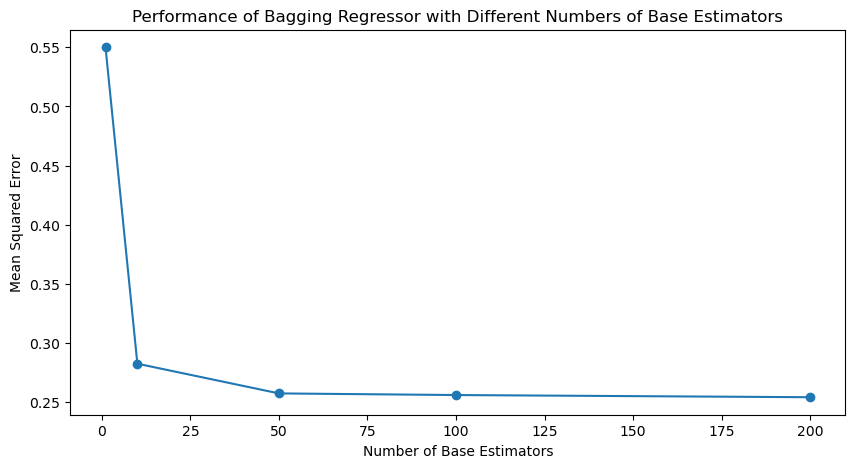

In [15]:
#32. Train a Bagging Regressor with different numbers of base estimators and compare performance

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_list = [1, 10, 50, 100, 200]
mse_list = []

# Initialize the Bagging Regressor with DecisionTreeRegressor as the base estimator
for n_estimators in n_estimators_list: 
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.figure(figsize=(10, 5))
plt.plot(n_estimators_list, mse_list, marker='o')
plt.xlabel('Number of Base Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Performance of Bagging Regressor with Different Numbers of Base Estimators')
plt.show()


In [61]:
#33.Train a Random Forest Classifier and analyze misclassified samples 

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


iris = load_breast_cancer()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

# Identify misclassified samples
misclassified_samples = X_test[y_test != y_pred]
print("Misclassified Samples:")
print(misclassified_samples)


              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 59   4]
 [  1 107]]
Misclassified Samples:
[[1.334e+01 1.586e+01 8.649e+01 5.200e+02 1.078e-01 1.535e-01 1.169e-01
  6.987e-02 1.942e-01 6.902e-02 2.860e-01 1.016e+00 1.535e+00 1.296e+01
  6.794e-03 3.575e-02 3.980e-02 1.383e-02 2.134e-02 4.603e-03 1.553e+01
  2.319e+01 9.666e+01 6.149e+02 1.536e-01 4.791e-01 4.858e-01 1.708e-01
  3.527e-01 1.016e-01]
 [1.380e+01 1.579e+01 9.043e+01 5.841e+02 1.007e-01 1.280e-01 7.789e-02
  5.069e-02 1.662e-01 6.566e-02 2.787e-01 6.205e-01 1.957e+00 2.335e+01
  4.717e-03 2.065e-02 1.759e-02 9.206e-03 1.220e-02 3.130e-03 1.657e+01
  2.086e+01 1.103e+02 8.124e+02 1.411e-01 3.542e-01 2.779e-01 1.383e-01
  2.589e-01 1.030e-01]
 [1.3

In [71]:
#40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare 
#performance

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

boston = fetch_california_housing()
X = boston.data
y = boston.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()


bagging_dt = BaggingRegressor(estimator=dt)
bagging_dt.fit(X_train, y_train)


bagging_knn = BaggingRegressor(estimator=knn)
bagging_knn.fit(X_train, y_train)

y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)

# Evaluate the performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"Mean Squared Error (DecisionTree): {mse_dt}")
print(f"Mean Squared Error (KNeighbors): {mse_knn}")


Mean Squared Error (DecisionTree): 0.2885716163522112
Mean Squared Error (KNeighbors): 1.1228861439830626


In [77]:
#42  Train a Bagging Classifier and evaluate its performance using cross-validation

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Evaluate the performance using cross-validation
cross_val_score(bagging_clf, X, y, cv=5,verbose=3)


[CV] END ................................ score: (test=0.967) total time=   0.3s
[CV] END ................................ score: (test=0.967) total time=   0.3s
[CV] END ................................ score: (test=0.900) total time=   0.3s
[CV] END ................................ score: (test=0.967) total time=   0.3s
[CV] END ................................ score: (test=1.000) total time=   0.3s


array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [79]:
#45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data = load_diabetes()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bootstrap_samples = [0.5, 0.7, 1.0]

mse_scores = []

for bs in bootstrap_samples:
    # Train Bagging Regressor with different levels of bootstrap samples
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, max_samples=bs, random_state=42)
    bagging_reg.fit(X_train, y_train)

    y_pred = bagging_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Bootstrap samples: {bs}, Mean Squared Error: {mse}")



Bootstrap samples: 0.5, Mean Squared Error: 2748.3134203007517
Bootstrap samples: 0.7, Mean Squared Error: 2768.270886466166
Bootstrap samples: 1.0, Mean Squared Error: 2908.80615037594
